Tasks:

Step 1: Understand and Explore the Data

✅• Load the dataset
✅• View samples:df.head(), df.tail()
✅• Check structure: df.info()
✅• Check summary statistics:df.describe()
• Understand what each column means (data dictionary).
• Visualize relationships

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("training.csv")

# Inspect structure
print(df.shape)
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())


(640840, 10)
   Unnamed: 0  store_ID  day_of_week        date  nb_customers_on_day  open  \
0      425390       366            4  2013-04-18                  517     1   
1      291687       394            6  2015-04-11                  694     1   
2      411278       807            4  2013-08-29                  970     1   
3      664714       802            2  2013-05-28                  473     1   
4      540835       726            4  2013-10-10                 1068     1   

   promotion state_holiday  school_holiday  sales  
0          0             0               0   4422  
1          0             0               0   8297  
2          1             0               0   9729  
3          1             0               0   6513  
4          1             0               0  10882  
        Unnamed: 0  store_ID  day_of_week        date  nb_customers_on_day  \
640835      359783       409            6  2013-10-26                  483   
640836      152315        97            1  2

In [2]:
data_dict = df.dtypes.to_dict()
print(data_dict)

# this gives up a list of the col and the data type

{'Unnamed: 0': dtype('int64'), 'store_ID': dtype('int64'), 'day_of_week': dtype('int64'), 'date': dtype('O'), 'nb_customers_on_day': dtype('int64'), 'open': dtype('int64'), 'promotion': dtype('int64'), 'state_holiday': dtype('O'), 'school_holiday': dtype('int64'), 'sales': dtype('int64')}


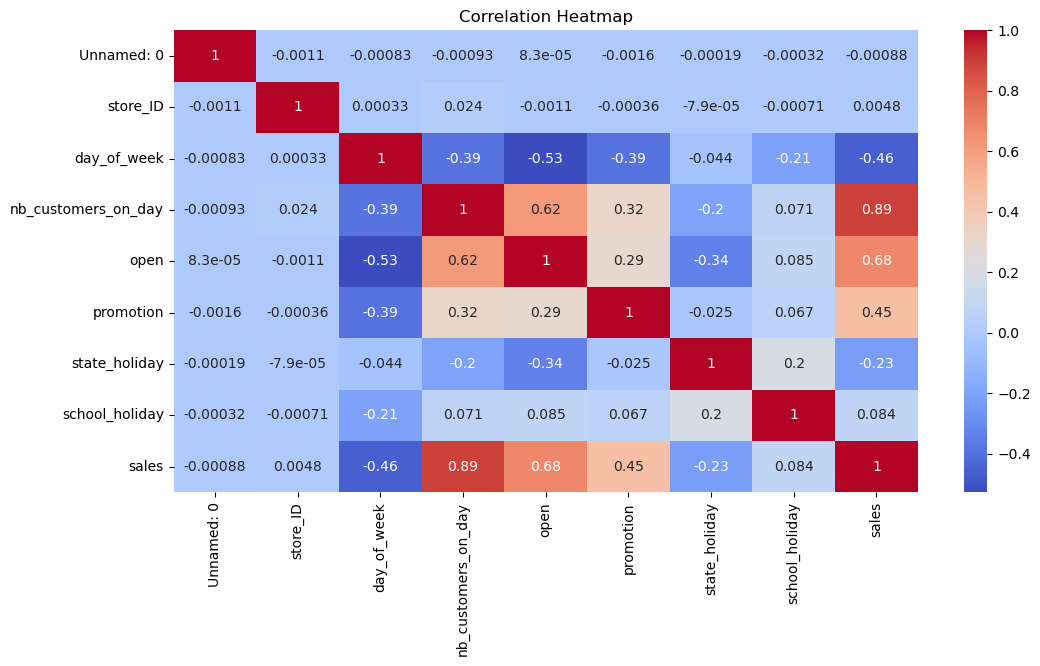

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


df['state_holiday'] = df['state_holiday'].astype('category').cat.codes


correlation = df.corr(numeric_only=True)



plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# this correlation map shows us that there is a high correlation between the number of 
# customersa and the number of sales

In [4]:
# 2nd STEP DATA CLEANING
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

#this tells us there is no missing vals

Missing values in each column:
Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64


In [5]:
df = df.drop('Unnamed: 0', axis=1)


# we drop drop the first col as it is irrelevant

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID             640840 non-null  int64 
 1   day_of_week          640840 non-null  int64 
 2   date                 640840 non-null  object
 3   nb_customers_on_day  640840 non-null  int64 
 4   open                 640840 non-null  int64 
 5   promotion            640840 non-null  int64 
 6   state_holiday        640840 non-null  int8  
 7   school_holiday       640840 non-null  int64 
 8   sales                640840 non-null  int64 
dtypes: int64(7), int8(1), object(1)
memory usage: 39.7+ MB
None


In [7]:
# df['date'] = df['date'].astype('category').cat.codes

# same as the cell below

In [8]:
df['date'] = pd.to_datetime(df['date'])
#converts dates into numbers

In [9]:

#columns (like 'state_holiday')
#df = pd.get_dummies(df, columns=['state_holiday'], drop_first=True)

#print(df.info())

In [10]:
df.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,4,2013-04-18,517,1,0,0,0,4422
1,394,6,2015-04-11,694,1,0,0,0,8297
2,807,4,2013-08-29,970,1,1,0,0,9729
3,802,2,2013-05-28,473,1,1,0,0,6513
4,726,4,2013-10-10,1068,1,1,0,0,10882


In [11]:
df['date'] = pd.to_datetime(df['date'])
df['date_number'] = df['date'].astype('int64') // 10**9

#converts the date from text to a number

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   store_ID             640840 non-null  int64         
 1   day_of_week          640840 non-null  int64         
 2   date                 640840 non-null  datetime64[ns]
 3   nb_customers_on_day  640840 non-null  int64         
 4   open                 640840 non-null  int64         
 5   promotion            640840 non-null  int64         
 6   state_holiday        640840 non-null  int8          
 7   school_holiday       640840 non-null  int64         
 8   sales                640840 non-null  int64         
 9   date_number          640840 non-null  int64         
dtypes: datetime64[ns](1), int64(8), int8(1)
memory usage: 44.6 MB
None


In [13]:
df.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,date_number
0,366,4,2013-04-18,517,1,0,0,0,4422,1366243200
1,394,6,2015-04-11,694,1,0,0,0,8297,1428710400
2,807,4,2013-08-29,970,1,1,0,0,9729,1377734400
3,802,2,2013-05-28,473,1,1,0,0,6513,1369699200
4,726,4,2013-10-10,1068,1,1,0,0,10882,1381363200


In [14]:
df['date'] = df['date'].astype(str)

In [15]:
df.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,date_number
0,366,4,2013-04-18,517,1,0,0,0,4422,1366243200
1,394,6,2015-04-11,694,1,0,0,0,8297,1428710400
2,807,4,2013-08-29,970,1,1,0,0,9729,1377734400
3,802,2,2013-05-28,473,1,1,0,0,6513,1369699200
4,726,4,2013-10-10,1068,1,1,0,0,10882,1381363200


In [16]:
df = df.drop('date', axis=1)

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   store_ID             640840 non-null  int64
 1   day_of_week          640840 non-null  int64
 2   nb_customers_on_day  640840 non-null  int64
 3   open                 640840 non-null  int64
 4   promotion            640840 non-null  int64
 5   state_holiday        640840 non-null  int8 
 6   school_holiday       640840 non-null  int64
 7   sales                640840 non-null  int64
 8   date_number          640840 non-null  int64
dtypes: int64(8), int8(1)
memory usage: 39.7 MB
None


In [18]:
df.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,date_number
0,366,4,517,1,0,0,0,4422,1366243200
1,394,6,694,1,0,0,0,8297,1428710400
2,807,4,970,1,1,0,0,9729,1377734400
3,802,2,473,1,1,0,0,6513,1369699200
4,726,4,1068,1,1,0,0,10882,1381363200


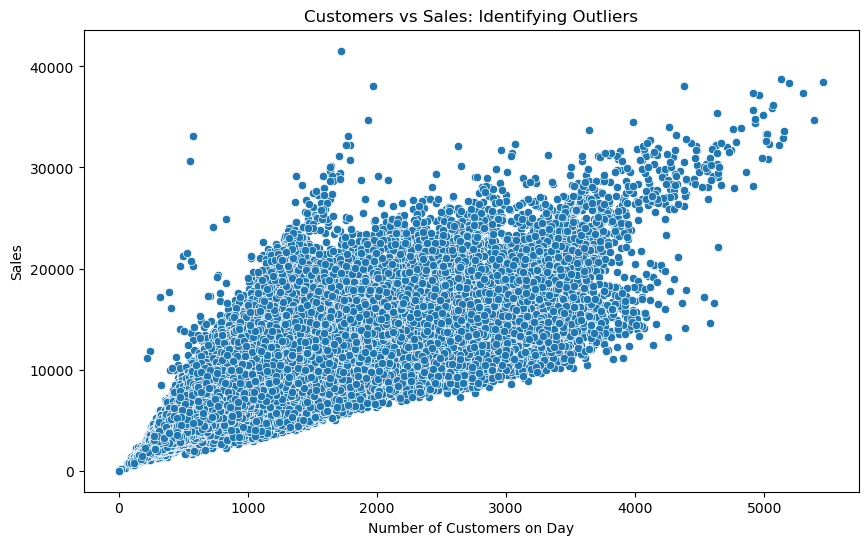

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='nb_customers_on_day', y='sales')
plt.title("Customers vs Sales: Identifying Outliers")
plt.xlabel("Number of Customers on Day")
plt.ylabel("Sales")
plt.show()

#Scatter plot of customers on day and number of sales to identify outliers. 
#Good because it could indicate outliers (like a day with unusually high sales or customer count)
#eg The blue point at the very top of your scatter plot likely represents an outlier with 
# extremely high sales compared to the overall pattern for the number of customers on that day.

In [20]:
df

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,date_number
0,366,4,517,1,0,0,0,4422,1366243200
1,394,6,694,1,0,0,0,8297,1428710400
2,807,4,970,1,1,0,0,9729,1377734400
3,802,2,473,1,1,0,0,6513,1369699200
4,726,4,1068,1,1,0,0,10882,1381363200
...,...,...,...,...,...,...,...,...,...
640835,409,6,483,1,0,0,0,4553,1382745600
640836,97,1,987,1,1,0,0,12307,1397433600
640837,987,1,925,1,0,0,0,6800,1404691200
640838,1084,4,725,1,0,0,0,5344,1402531200


In [21]:
Q1 = df['store_ID'].quantile(0.25)
Q3 = df['store_ID'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['store_ID'] > upper_bound) | (df['store_ID'] < lower_bound)
plt.scatter(df.index, df['store_ID'], c=outliers.map({True:'red', False:'blue'}))
plt.title("Outliers Highlighted in Red")
plt.show()

KeyboardInterrupt: 

In [22]:
df.dtypes

store_ID               int64
day_of_week            int64
nb_customers_on_day    int64
open                   int64
promotion              int64
state_holiday           int8
school_holiday         int64
sales                  int64
date_number            int64
dtype: object

In [ ]:
#step 3: PREPARE FEATURES AND ENCODE CATEGORICAL VARIABLES:
# 1. Separate Features and Target

# 2. Identify Feature Types

#3. Categorical Variables: Convert text labels into numeric values

#4. Identify Feature Types

#5 Encode Categorical Variables: Convert text labels into numeric values



In [23]:
X = df.drop('sales', axis=1)
y = df.sales
#Removes the 'sales' column from your DataFrame and 
# puts all the remaining columns (like store_ID, day_of_week, nb_customers_on_day, etc.) into X.
# Saves the 'sales' column as a separate variable called y.

#This is your target variable—the thing you want your model to predict.

In [ ]:
# 4ST SPLIT DATA INTO TRAINING AND TEST SETS

In [24]:
df.sort_values(by='date_number', inplace=True)
# We sort by date to maintain temporal order

In [25]:
df.head()
#test

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,date_number
296090,401,2,0,0,0,1,1,0,1356998400
520181,679,2,0,0,0,1,1,0,1356998400
183479,892,2,0,0,0,1,1,0,1356998400
360138,312,2,0,0,0,1,1,0,1356998400
302547,250,2,0,0,0,1,1,0,1356998400


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#code uses scikit-learn's train_test_split to randomly divide your dataset into two parts: training data and testing data

In [27]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#each feature has a mean of 0 and a standard deviation of 1.

#Now split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

In [28]:
X_scaled

#values of the scaled data

array([[-5.97155402e-01, -9.45739742e-05, -2.50808163e-01, ...,
        -1.59657656e-01, -4.66094382e-01, -1.30464993e+00],
       [-5.10165994e-01,  1.00167048e+00,  1.30580047e-01, ...,
        -1.59657656e-01, -4.66094382e-01,  1.32951994e+00],
       [ 7.72927767e-01, -9.45739742e-05,  7.25287085e-01, ...,
        -1.59657656e-01, -4.66094382e-01, -8.20079261e-01],
       ...,
       [ 1.33214539e+00, -1.50274215e+00,  6.28323981e-01, ...,
        -1.59657656e-01, -4.66094382e-01,  3.16657942e-01],
       [ 1.63350155e+00, -9.45739742e-05,  1.97376852e-01, ...,
        -1.59657656e-01, -4.66094382e-01,  2.25573230e-01],
       [ 4.24970137e-01,  1.50255300e+00, -1.36480649e+00, ...,
        -1.59657656e-01, -4.66094382e-01,  1.40967448e+00]])

In [29]:
#STEP 5: MODEL SELECTION AND TRAINING
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

#trains the model on your training data 

LinearRegression()

In [30]:
y_val_pred = model1.predict(X_test)

#Trained linear regression model is used to make predictions.
#The model takes the input features from your test set X_test 
# # and The model outputs the predicted sales values and stores in y_val_pred

print(y_val_pred)

[9854.23562766  -54.94060079 5185.88970629 ... 5329.20339061 6587.05746577
 6556.70734472]


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_val_pred)
mse = mean_squared_error(y_test, y_val_pred)
r2 = r2_score(y_test, y_val_pred)
#accuracy = model1.score(y_test, y_val_pred) 

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")
#print(f"Accuracy: {accuracy:.2f}")

#Mean Absolute Error (MAE)

# Measures the average size of errors

#MSE Squaring the errors means large mistakes count much more—so MSE highlights "bad misses" much stronger than MAE.

#Measures how much of the variation in actual values is explained by your predicted values.

#R² = 1: Perfect fit (the predictions are exactly right)

#R² = 0: Model doesn't help at all compared to just guessing the average.​

#Higher R² means your model can predict the target (like sales) more accurately

MAE: 986.88
MSE: 2185334.35
R²: 0.85


In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predictions
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)
# Train performance
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
# Test performance
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
# Print results
print("=== Train Performance ===")
print(f"MAE: {train_mae:.2f}")
print(f"MSE: {train_mse:.2f}")
print(f"R²: {train_r2:.2f}")
print("\n=== Test Performance ===")
print(f"MAE: {test_mae:.2f}")
print(f"MSE: {test_mse:.2f}")
print(f"R²: {test_r2:.2f}")

=== Train Performance ===
MAE: 986.76
MSE: 2164500.54
R²: 0.85

=== Test Performance ===
MAE: 986.88
MSE: 2185334.35
R²: 0.85


In [ ]:
# plot a scatter plot prediction vs actual results
# try another model
# start presentation

In [97]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
tscv = TimeSeriesSplit(n_splits=2)
scores = cross_val_score(model, X, y, cv=tscv, scoring='r2')
print("R² scores per fold:", scores)
print("Mean R²:", scores.mean())

# this random forest gives a good result but takes ages, could be overfitted

R² scores per fold: [0.93092036 0.94601712]
Mean R²: 0.9384687397239673


In [95]:
#polynomial regression - dealing with more features - this gives a fast and better result

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# Create a pipeline to generate polynomial features and fit a linear regression
model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("✅ Polynomial Regression Results")
print("--------------------------------")
print("R² Score:", round(r2, 3))
print("Mean Absolute Error:", round(mae, 2))


# we tried two models one was linear regression and the other was an 
# ensenble method of polynomial and linear regression this gave the better results

✅ Polynomial Regression Results
--------------------------------
R² Score: 0.876
Mean Absolute Error: 896.42


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# Train performance
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
# Test performance
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
# Print results
print("=== Train Performance ===")
print(f"MAE: {train_mae:.2f}")
print(f"MSE: {train_mse:.2f}")
print(f"R²: {train_r2:.2f}")
print("\n=== Test Performance ===")
print(f"MAE: {test_mae:.2f}")
print(f"MSE: {test_mse:.2f}")
print(f"R²: {test_r2:.2f}")

=== Train Performance ===
MAE: 897.21
MSE: 1819521.26
R²: 0.88

=== Test Performance ===
MAE: 896.42
MSE: 1832625.57
R²: 0.88


In [36]:
rd = pd.read_csv("REAL_DATA.csv")

In [37]:
print(rd.shape)
print(rd.head())
print(rd.tail())
print(rd.info())
print(rd.describe())

(71205, 9)
    index  store_ID  day_of_week        date  nb_customers_on_day  open  \
0  272371       415            7  01/03/2015                    0     0   
1  558468        27            7  29/12/2013                    0     0   
2   76950       404            3  19/03/2014                  657     1   
3   77556       683            2  29/01/2013                  862     1   
4  456344       920            3  19/03/2014                  591     1   

   promotion state_holiday  school_holiday  
0          0             0               0  
1          0             0               0  
2          1             0               0  
3          0             0               0  
4          1             0               0  
        index  store_ID  day_of_week        date  nb_customers_on_day  open  \
71200   59062       441            7  26/10/2014                    0     0   
71201  687449       377            7  18/08/2013                    0     0   
71202  207393        15        

In [38]:
# now we do the same for the real data, looks good
rd.isnull().sum()



index                  0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
dtype: int64

In [39]:
rd = rd.drop('index', axis=1)

In [40]:
print (rd)

       store_ID  day_of_week        date  nb_customers_on_day  open  \
0           415            7  01/03/2015                    0     0   
1            27            7  29/12/2013                    0     0   
2           404            3  19/03/2014                  657     1   
3           683            2  29/01/2013                  862     1   
4           920            3  19/03/2014                  591     1   
...         ...          ...         ...                  ...   ...   
71200       441            7  26/10/2014                    0     0   
71201       377            7  18/08/2013                    0     0   
71202        15            3  11/06/2014                  648     1   
71203       950            2  23/04/2013                  626     1   
71204       932            4  21/11/2013                  828     1   

       promotion state_holiday  school_holiday  
0              0             0               0  
1              0             0               0  


In [41]:
rd["date"] = pd.to_datetime(rd["date"], dayfirst=True)
rd["date_number"] = rd["date"].astype("int64") // 10**9

print(rd)

       store_ID  day_of_week       date  nb_customers_on_day  open  promotion  \
0           415            7 2015-03-01                    0     0          0   
1            27            7 2013-12-29                    0     0          0   
2           404            3 2014-03-19                  657     1          1   
3           683            2 2013-01-29                  862     1          0   
4           920            3 2014-03-19                  591     1          1   
...         ...          ...        ...                  ...   ...        ...   
71200       441            7 2014-10-26                    0     0          0   
71201       377            7 2013-08-18                    0     0          0   
71202        15            3 2014-06-11                  648     1          0   
71203       950            2 2013-04-23                  626     1          1   
71204       932            4 2013-11-21                  828     1          1   

      state_holiday  school

In [42]:
rd = rd.drop('date', axis=1)


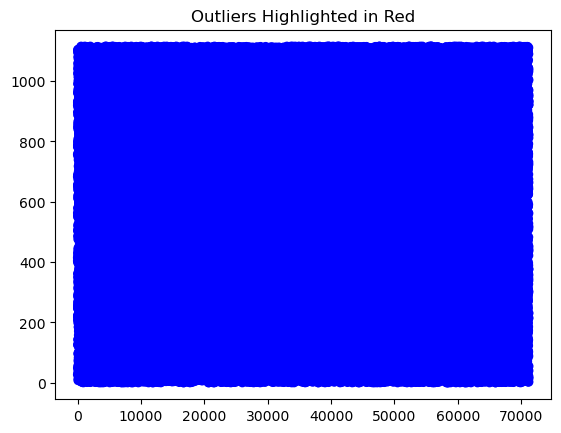

In [43]:
Q1 = rd['store_ID'].quantile(0.25)
Q3 = rd['store_ID'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (rd['store_ID'] > upper_bound) | (rd['store_ID'] < lower_bound)
plt.scatter(rd.index, rd['store_ID'], c=outliers.map({True:'red', False:'blue'}))
plt.title("Outliers Highlighted in Red")
plt.show()

In [44]:
rd.sort_values(by='date_number', inplace=True)

In [45]:
rd.head

<bound method NDFrame.head of        store_ID  day_of_week  nb_customers_on_day  open  promotion  \
47491       887            2                    0     0          0   
49437       329            2                    0     0          0   
6035        750            2                    0     0          0   
7633        622            2                    0     0          0   
54627       305            2                    0     0          0   
...         ...          ...                  ...   ...        ...   
59850       233            5                 1148     1          1   
68773       899            5                  582     1          1   
30134       700            5                  646     1          1   
34564       908            5                  421     1          1   
51284       306            5                  593     1          1   

      state_holiday  school_holiday  date_number  
47491             a               1   1356998400  
49437             a        

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
rd['state_holiday'] = le.fit_transform(rd['state_holiday'])

In [47]:
#rd = rd.drop('state_holiday', axis=1)

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_Realscaled = scaler.fit_transform(rd)

#same scaler applied to real data

In [48]:



rd.shape
#df.shape

#rd.head
df.head

print (list(rd.columns.values))
print (list(X.columns.values))




['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion', 'state_holiday', 'school_holiday', 'date_number']
['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion', 'state_holiday', 'school_holiday', 'date_number']


In [49]:
print (list(rd.columns.values))

['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion', 'state_holiday', 'school_holiday', 'date_number']


In [52]:
X

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,date_number
0,366,4,517,1,0,0,0,1366243200
1,394,6,694,1,0,0,0,1428710400
2,807,4,970,1,1,0,0,1377734400
3,802,2,473,1,1,0,0,1369699200
4,726,4,1068,1,1,0,0,1381363200
...,...,...,...,...,...,...,...,...
640835,409,6,483,1,0,0,0,1382745600
640836,97,1,987,1,1,0,0,1397433600
640837,987,1,925,1,0,0,0,1404691200
640838,1084,4,725,1,0,0,0,1402531200


In [64]:
print("Columns in rd:", rd.columns.tolist())
print("Number of features:", len(rd.columns))
# Remove y_final before predicting
rd_features = rd.drop(columns=['y_final'])
# Optional: double-check the number of columns
print("Number of features after drop:", len(rd_features.columns))
# Apply the same scaling as during training
rd_scaled = scaler.transform(rd_features)
# Predict
y_final = model1.predict(rd_scaled)


Columns in rd: ['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion', 'state_holiday', 'school_holiday', 'date_number', 'y_final']
Number of features: 9
Number of features after drop: 8


In [83]:
import numpy as np

print("Columns in rd:", rd.columns.tolist())
print("Number of features:", len(rd.columns))

# Remove y_final before predicting (if it exists)
if 'y_final' in rd.columns:
    rd_features = rd.drop(columns=['y_final'])
else:
    rd_features = rd.copy()

# Optional: double-check number of columns
print("Number of features after drop:", len(rd_features.columns))

# Apply the same scaling as during training
rd_scaled = scaler.transform(rd_features)

# Predict
y_final = model1.predict(rd_scaled)







Columns in rd: ['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion', 'state_holiday', 'school_holiday', 'date_number', 'y_final']
Number of features: 9
Number of features after drop: 8


In [87]:
rd["y_final"] = y_final

In [88]:
rd

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,date_number,y_final
0,887,2,0,0,0,1,1,1356998400,-209.824463
1,329,2,0,0,0,1,1,1356998400,-130.140476
2,750,2,0,0,0,1,1,1356998400,-190.260473
3,622,2,0,0,0,1,1,1356998400,-171.981709
4,305,2,0,0,0,1,1,1356998400,-126.713208
...,...,...,...,...,...,...,...,...,...
71200,233,5,1148,1,1,0,1,1438300800,10185.947217
71201,899,5,582,1,1,0,1,1438300800,6674.527507
71202,700,5,646,1,1,0,1,1438300800,7089.242151
71203,908,5,421,1,1,0,1,1438300800,5701.464197


In [90]:
rd = scaler.inverse_transform(rd_scaled)

In [93]:
rd

array([[8.8700000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.3569984e+09],
       [3.2900000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.3569984e+09],
       [7.5000000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.3569984e+09],
       ...,
       [7.0000000e+02, 5.0000000e+00, 6.4600000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.4383008e+09],
       [9.0800000e+02, 5.0000000e+00, 4.2100000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.4383008e+09],
       [3.0600000e+02, 5.0000000e+00, 5.9300000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 1.4383008e+09]])

In [ ]:
# Save results
rd.to_csv('g3_fixed.csv', index=False)

print("✅ Predictions complete — saved as 'g3_fixed.csv'")
print("Preview of predictions:")
print(rd[['y_final']].head())

In [ ]:
# Example if you scaled y during training:
#y_final_original = scaler.inverse_transform(y_final.reshape(-1, 1))


ValueError: non-broadcastable output operand with shape (71205,1) doesn't match the broadcast shape (71205,8)

In [ ]:
# Add results back
rd["y_final"] = y_final
# Save results
rd.to_csv('g3.csv', index=False)

In [70]:
rd = pd.read_csv("g3_fixed.csv")

In [75]:
y_final = scaler.inverse_transform(y_final.reshape(-1, 1)).ravel()

ValueError: non-broadcastable output operand with shape (71205,1) doesn't match the broadcast shape (71205,8)

In [71]:
rd.head

<bound method NDFrame.head of        store_ID  day_of_week  nb_customers_on_day  open  promotion  \
0           887            2                    0     0          0   
1           329            2                    0     0          0   
2           750            2                    0     0          0   
3           622            2                    0     0          0   
4           305            2                    0     0          0   
...         ...          ...                  ...   ...        ...   
71200       233            5                 1148     1          1   
71201       899            5                  582     1          1   
71202       700            5                  646     1          1   
71203       908            5                  421     1          1   
71204       306            5                  593     1          1   

       state_holiday  school_holiday  date_number       y_final  
0                  1               1   1356998400      0.000000